## Bài tập 1 (Hiện thực giải thuật linear regression theo phương pháp vectorization):

##### Library import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import genfromtxt

##### Data import and preprocessing by standardization

In [2]:
# dataset
data = genfromtxt('advertising.csv', delimiter=',', skip_header=1)
N = data.shape[0]
X = data[:,:3]
y = data[:,3:]

# Normalize input data by using mean normalizaton
def mean_normalization(X):
    N = len(X)
    maxi = np.max(X)
    mini = np.min(X)
    avg = np.mean(X)
    X = (X - avg) / (maxi - mini)
    X_b = np.c_[np.ones((N,1)), X]
    return X_b, maxi, mini, avg

X_b, maxi, mini, avg = mean_normalization(X)

In [3]:
X_b

array([[ 1.00000000e+00,  5.50426788e-01, -9.83586370e-02,
         7.57928475e-03],
       [ 1.00000000e+00, -7.57540486e-02, -9.32979082e-02,
        -7.37297571e-02],
       [ 1.00000000e+00, -1.67859312e-01, -7.10307018e-02,
         7.91666667e-03],
       [ 1.00000000e+00,  2.85244602e-01, -8.65502699e-02,
        -2.85205803e-02],
       [ 1.00000000e+00,  3.84097503e-01, -1.89451754e-01,
        -2.88579622e-02],
       [ 1.00000000e+00, -1.96536775e-01, -6.09092443e-02,
         2.71474359e-02],
       [ 1.00000000e+00, -3.18943995e-02, -1.15227733e-01,
        -1.46604251e-01],
       [ 1.00000000e+00,  1.79644062e-01, -1.59762146e-01,
        -1.86752699e-01],
       [ 1.00000000e+00, -1.96874157e-01, -2.18803981e-01,
        -2.22515182e-01],
       [ 1.00000000e+00,  4.48200067e-01, -2.17117072e-01,
        -1.54364035e-01],
       [ 1.00000000e+00, -2.87955466e-03, -2.06320850e-01,
        -1.44242578e-01],
       [ 1.00000000e+00,  4.98469973e-01, -1.44917341e-01,
      

##### Schocastic Gradient Descent Implementation

In [4]:
def stochastic_gradient_descent(X_b, y, n_epochs=50, learning_rate=0.00001):

    # thetas = np.random.randn(4,1) # uncomment this line for real application
    thetas = np.asarray([[1.16270837] , [ -0.81960489] , [1.39501033] ,[0.29763545]])
    
    thetas_path = [thetas]
    losses = []
    
    for epoch in range(n_epochs):
        for i in range(N):
            # select random number in N  
            # random_index = np.random.randint(N) # In real application, you should use this code
            random_index = i # This code is used for this assignment only
            
            xi = X_b[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            
            # Compute output
            yi_hat = xi @ thetas
            
            # Compute loss li
            li = (yi - yi_hat)**2 / 2 
            
            # Compute gradient for loss
            dli = 2 * (yi_hat - yi)
            
            # Compute gradient
            dlidw = dli * xi
            
            # update theta
            thetas -= learning_rate * dlidw.T
            
            # logging
            losses.append(li.squeeze())
    
    return thetas_path, losses

###### Demo

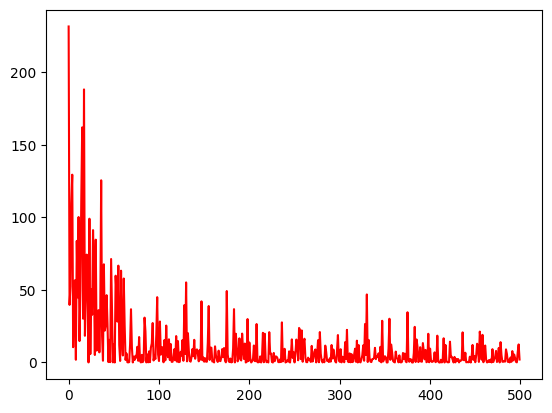

In [5]:
sgd_theta, losses = stochastic_gradient_descent(X_b, y, n_epochs=50, learning_rate=0.01)
x_axis = list(range(500))
plt.plot(x_axis, losses[:500], color='r')
plt.show()

In [6]:
sgd_theta , losses = stochastic_gradient_descent ( X_b , y , n_epochs =1 , learning_rate=0.01 )
print ( np.sum( losses ) )

4196.314606545337


##### Minibatch Gradient Descent Implementation

In [8]:
def mini_batch_gradient_descent(X_b, y, n_epochs=50, minibatch_size=20, learning_rate=0.01):

    # thetas = np.random.randn(4,1)
    thetas = np.asarray([[1.16270837], [-0.81960489], [1.39501033], [0.29763545]])
    
    thetas_path = [thetas]
    losses = []
    
    for epoch in range(n_epochs):
        # shuffled_indices = np.random.permutation(N) # uncomment this code for real application
        
        shuffled_indices = np.asarray([21, 144, 17, 107, 37, 115, 167, 31, 3, 132, 179, 155, 36, 191, 182, 170, 27, 35, 162, 25, 28, 73, 172, 152, 102, 16, 185, 11, 1, 34, 177, 29, 96, 22, 76, 196, 6, 128, 114, 117, 111, 43, 57, 126, 165, 78, 151, 104, 110, 53, 181, 113, 173, 75, 23, 161, 85, 94, 18, 148, 190, 169, 149, 79, 138, 20, 108, 137, 93, 192, 198, 153, 4, 45, 164, 26, 8, 131, 77, 80, 130, 127, 125, 61, 10, 175, 143, 87, 33, 50, 54, 97, 9, 84, 188, 139, 195, 72, 64, 194, 44, 109, 112, 60, 86, 90, 140, 171, 59, 199, 105, 41, 147, 92, 52, 124, 71, 197, 163, 98, 189, 103, 51, 39, 180, 74, 145, 118, 38, 47, 174, 100, 184, 183, 160, 69, 91, 82, 42, 89, 81, 186, 136, 63, 157, 46, 67, 129, 120, 116, 32, 19, 187, 70, 141, 146, 15, 58, 119, 12, 95, 0, 40, 83, 24, 168, 150, 178, 49, 159, 7, 193, 48, 30, 14, 121, 5, 142, 65, 176, 101, 55, 133, 13, 106, 66, 99, 68, 135, 158, 88, 62, 166, 156, 2, 134, 56, 123, 122, 154])
        
        X_b_shuffled = X_b[shuffled_indices]
        y_shuffled = y[shuffled_indices]
        
        for i in range(0, N, minibatch_size):
            xi = X_b_shuffled[i:i+minibatch_size]
            yi = y_shuffled[i:i+minibatch_size]
            
            # Compute output
            yi_hat = xi @ thetas
    
            # Compute loss li
            loss = (yi - yi_hat) ** 2 / 2
            
            # Compute gradient for loss
            dli = 2 * (yi_hat - yi)
            # Compute gradient
            gradients = (xi.T @ dli) / minibatch_size
            
            # update parameters
            thetas = thetas - learning_rate * gradients
            thetas_path.append(thetas)
            
            loss_mean = np.sum(loss) / minibatch_size
            losses.append(loss_mean)
    
    return thetas_path, losses


###### Demo

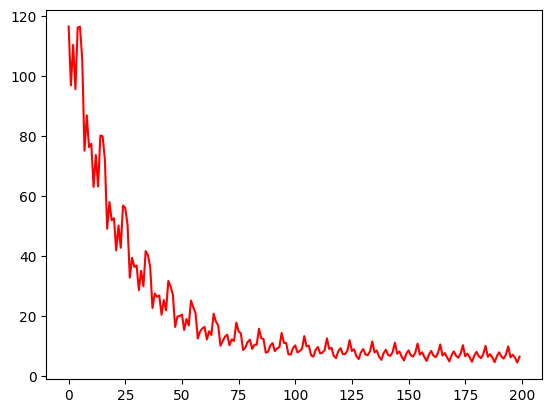

In [9]:
mbgd_thetas , losses = mini_batch_gradient_descent ( X_b , y , n_epochs =50 , minibatch_size = 20 , learning_rate =0.01)
x_axis = list ( range (200) )
plt.plot ( x_axis , losses [:200] , color ="r")
plt.show ()

In [148]:
mbgd_thetas , losses = mini_batch_gradient_descent ( X_b , y , n_epochs =50 , minibatch_size = 20 , learning_rate =0.01)
print ( round ( sum( losses ) ,2) )

11402.48


##### Batch Gradient Descent Implementation

In [166]:

def batch_gradient_descent(X_b, y, n_epochs=100, learning_rate=0.01):

    # thetas = np.random.randn(4,1) # uncomment this line for real application
    thetas = np.asarray([[1.16270837], [-0.81960489], [1.39501033], [0.29763545]])
    
    thetas_path = [thetas]
    losses = []
    
    for i in range(n_epochs):
        # Compute output
        y_hat = X_b @ thetas

        # Compute loss li
        loss = (y - y_hat) ** 2
        
        # Compute gradient for loss
        dl = 2 * (y_hat - y)
        # Compute gradient
        gradients = (X_b.T @ dl) / len(X_b)
        
        # Update parameters
        thetas = thetas - learning_rate * gradients
        thetas_path.append(thetas)
        
        mean_loss = np.sum(loss) / N
        losses.append(mean_loss)
    
    return thetas_path, losses

###### Demo

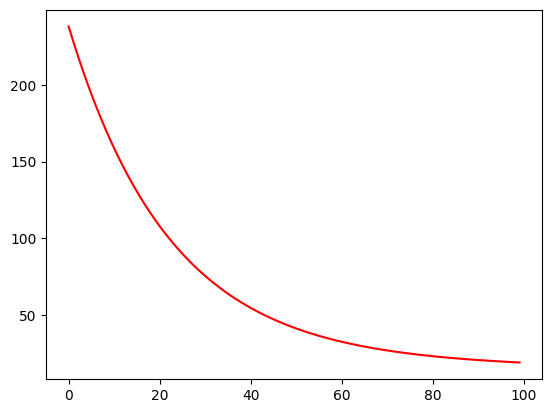

In [167]:
bgd_thetas , losses = batch_gradient_descent ( X_b , y , n_epochs =100 , learning_rate=0.01)
x_axis = list ( range (100) )
plt . plot ( x_axis , losses [:100] , color ="r")
plt . show ()

In [168]:
bgd_thetas , losses = batch_gradient_descent ( X_b , y , n_epochs =100 , learning_rate=0.01)
print ( round ( sum( losses ) ,2) )

6716.46
